# Uy narxini bashorat qilish bo`yicha Loyiha ishi 

# Loyiha qadamlari 
1) Muammoni tushunish va maqsad  
2) Ma’lumotlarni yuklash va ko‘rish  
3) EDA (Exploratory Data Analysis)  
4) Tozalash, xususiyatlar muhandisligi  
5) Ma’lumotlarni tayyorlash (train-test split, scaling, encoding)  
6) Turli algoritmlar bilan model yaratish  
7) Modelni baholash (R2, RMSE, MAE)  
8) Eng yaxshi modelni tanlash  
9) Natijalarni vizualizatsiya qilish  
10) Modelni saqlash  

# Ishni Pandas va Numpy Kutubxonalarini yuklab olishdan boshlaymiz

In [1]:
import pandas as pd
import numpy as np
import logging

# Data Setni chqirib olamiz 

In [2]:
logging.basicConfig(
    filename="info_log.log",
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
try:
    df = pd.read_csv("house_price.txt")
    logging.info("Data Set Muvaffaqiyatli Yuklandi")
except FileNotFoundError as e:
    logging.error("Data Set Topilmadi: %s", e)

# Data Set haqida malumotlarni ko`rib chiqamiz 

In [3]:
df.head()

,Unnamed: 0,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,...,district_10,district_11,district_12,district_13,elevator_1.0,floor_type_低,floor_type_底,floor_type_未知,floor_type_顶,floor_type_高
0,0,0.000000,0.627253,2016,0.092738,415.0,0.272992,0.250,0.2,0.333333,...,0,0,0,0,1,0,0,0,0,1
1,1,0.597040,0.406733,2016,0.110236,575.0,0.276039,0.250,0.4,0.333333,...,0,0,0,0,1,0,0,0,0,1
2,3,0.572140,0.717698,2016,0.120735,297.5,0.279617,0.375,0.2,0.333333,...,0,0,0,0,1,0,1,0,0,0
3,4,0.557084,0.414236,2016,0.250219,392.0,0.162585,0.250,0.2,0.333333,...,0,0,0,0,0,0,0,0,0,0
4,5,0.616393,0.582255,2016,0.049869,275.6,0.100757,0.125,0.0,0.333333,...,0,0,0,0,1,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283901 entries, 0 to 283900
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             283901 non-null  int64  
 1   Lng                    283900 non-null  float64
 2   Lat                    283901 non-null  float64
 3   tradeTime              283901 non-null  int64  
 4   followers              283901 non-null  float64
 5   totalPrice             283901 non-null  float64
 6   square                 283901 non-null  float64
 7   livingRoom             283901 non-null  float64
 8   drawingRoom            283901 non-null  float64
 9   kitchen                283901 non-null  float64
 10  bathRoom               283901 non-null  float64
 11  constructionTime       283901 non-null  float64
 12  ladderRatio            283901 non-null  float64
 13  fiveYearsProperty      283901 non-null  float64
 14  subway                 283901 non-nu

# Ushbu Datsetdagi malumotlarga asoslangan holda target qiymat sifatida "totalPrice" ustunini oldik

In [4]:
df["totalPrice"]

0         415.0
1         575.0
2         297.5
3         392.0
4         275.6
          ...  
283896    355.5
283897    350.0
283898    108.8
283899    359.0
283900    720.0
Name: totalPrice, Length: 283901, dtype: float64

In [9]:
df["totalPrice"].unique()

array([415. , 575. , 297.5, ..., 314.4, 554.4, 367.3], shape=(4476,))

# EDA (Exploratory Data Analysis) ni ko`rib chiqamiz 

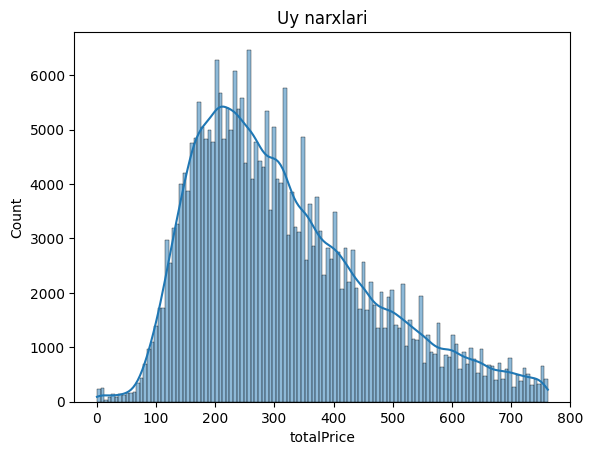

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['totalPrice'], kde=True)
plt.title('Uy narxlari')
plt.show()

# ushbu grafik orqali biz umumiy narx va mulklar soni bo`yicha taqqoslangan malumotni olishimiz mumkin. Bu yerda 200-300 orasidagi narxda mulklar eng ko`p tarqalganini ko`rishimiz mumkin  

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 24213 (\N{CJK UNIFIED IDEOGRAPH-5E95}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 39030 (\N{CJK UNIFIED IDEOGRAPH-9876}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24213 (\N{CJK UNIFIED IDEOGRAPH-5E95}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: 

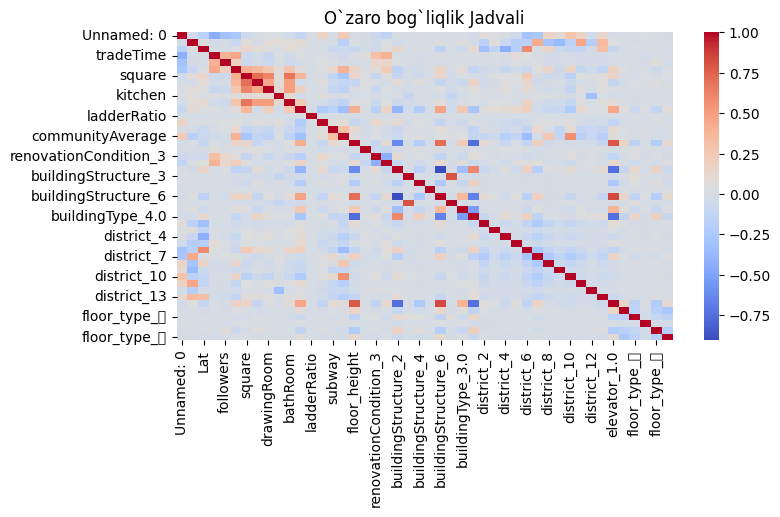

In [32]:
corr = df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap='coolwarm')
plt.title('O`zaro bog`liqlik Jadvali')
plt.show()

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 30693 (\N{CJK UNIFIED IDEOGRAPH-77E5}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 242

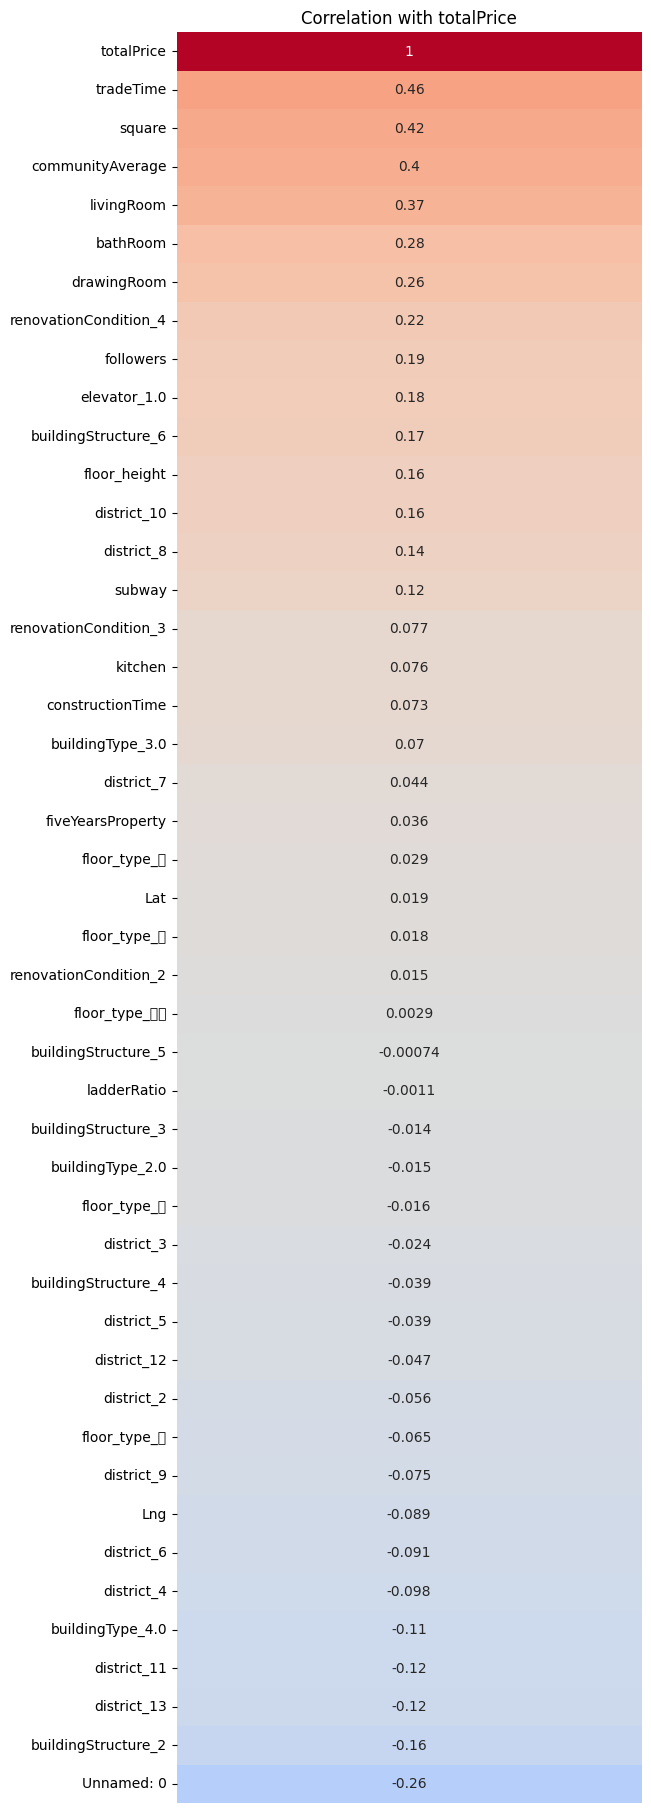

In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns


corr_matrix = df[numeric_cols].corr()


corr_target = corr_matrix['totalPrice'].sort_values(ascending=False)


corr_with_target = pd.DataFrame(corr_target)

plt.figure(figsize=(6, len(corr_with_target)/2))  
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation with totalPrice')
plt.yticks(rotation=0)
plt.xticks([])  
plt.show()

In [7]:
important_features = corr_target[corr_target > 0.25].index.tolist()
important_features = [feat for feat in important_features if feat != 'totalPrice']
print("Muhim xususiyatlar:", important_features)

Muhim xususiyatlar: ['tradeTime', 'square', 'communityAverage', 'livingRoom', 'bathRoom', 'drawingRoom']


In [8]:
from datetime import datetime
current_year = datetime.now().year
df['house_age'] = current_year - df['constructionTime']
df['total_rooms'] = df['livingRoom'] + df['drawingRoom'] + df['kitchen'] + df['bathRoom']
df['square_per_room'] = df['square'] / df['total_rooms']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283901 entries, 0 to 283900
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             283901 non-null  int64  
 1   Lng                    283900 non-null  float64
 2   Lat                    283901 non-null  float64
 3   tradeTime              283901 non-null  int64  
 4   followers              283901 non-null  float64
 5   totalPrice             283901 non-null  float64
 6   square                 283901 non-null  float64
 7   livingRoom             283901 non-null  float64
 8   drawingRoom            283901 non-null  float64
 9   kitchen                283901 non-null  float64
 10  bathRoom               283901 non-null  float64
 11  constructionTime       283901 non-null  float64
 12  ladderRatio            283901 non-null  float64
 13  fiveYearsProperty      283901 non-null  float64
 14  subway                 283901 non-nu

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 30693 (\N{CJK UNIFIED IDEOGRAPH-77E5}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 242

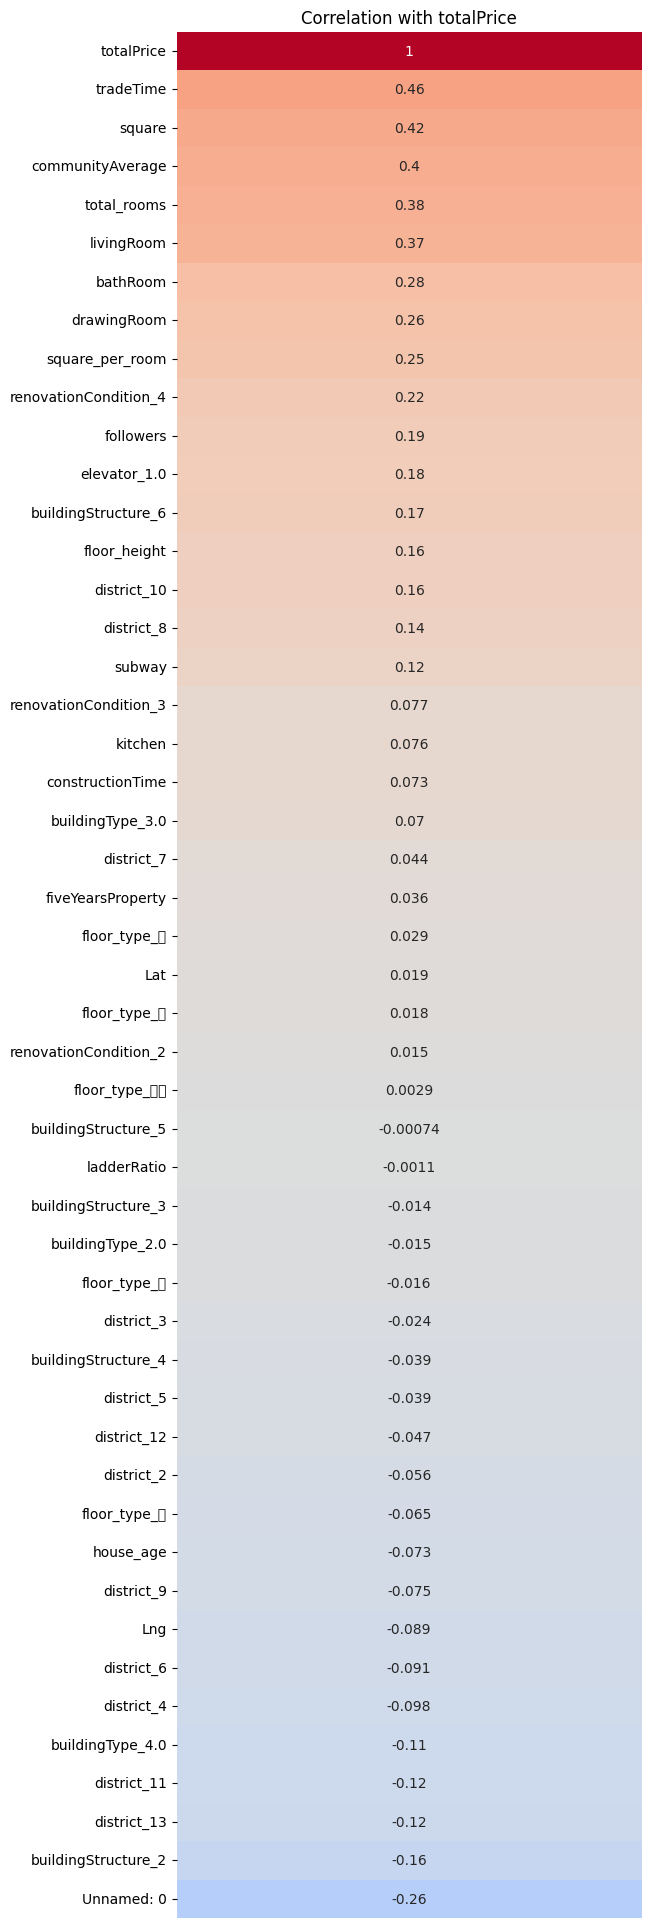

In [10]:
numeric_cols = df.select_dtypes(include=['number']).columns


corr_matrix = df[numeric_cols].corr()


corr_target = corr_matrix['totalPrice'].sort_values(ascending=False)


corr_with_target = pd.DataFrame(corr_target)

plt.figure(figsize=(6, len(corr_with_target)/2))  
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation with totalPrice')
plt.yticks(rotation=0)
plt.xticks([])  
plt.show()

In [11]:
df.describe(include='all')

,Unnamed: 0,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,...,district_13,elevator_1.0,floor_type_低,floor_type_底,floor_type_未知,floor_type_顶,floor_type_高,house_age,total_rooms,square_per_room
count,283901.000000,283900.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,...,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000
mean,160111.406258,0.542672,0.515713,2014.742414,0.014596,314.666440,0.159445,0.245836,0.229752,0.331239,...,0.031159,0.556479,0.199168,0.080859,0.003297,0.121821,0.218964,25.997513,0.971388,0.161288
std,91441.438760,0.176361,0.148571,1.659689,0.030155,149.120619,0.069397,0.092119,0.100170,0.033659,...,0.173747,0.496801,0.399375,0.272619,0.057324,0.327079,0.413545,8.820368,0.207598,0.063147
min,0.000000,0.000000,0.000000,2002.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.125000,0.000000
25%,82355.000000,0.426675,0.423443,2013.000000,0.000000,201.000000,0.110650,0.125000,0.200000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.801190,0.125786
50%,160134.000000,0.538907,0.490697,2015.000000,0.004374,285.000000,0.142557,0.250000,0.200000,0.333333,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.926190,0.155856
75%,238585.000000,0.634317,0.605344,2016.000000,0.015748,401.000000,0.194051,0.250000,0.200000,0.333333,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,1.051190,0.189584
max,318849.000000,1.000000,1.000000,2018.000000,1.000000,762.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000,2.788095,4.142469


--- totalPrice ustuni statistikalari ---
count    283901.000000
mean        314.666440
std         149.120619
min           0.100000
25%         201.000000
50%         285.000000
75%         401.000000
max         762.000000
Name: totalPrice, dtype: float64




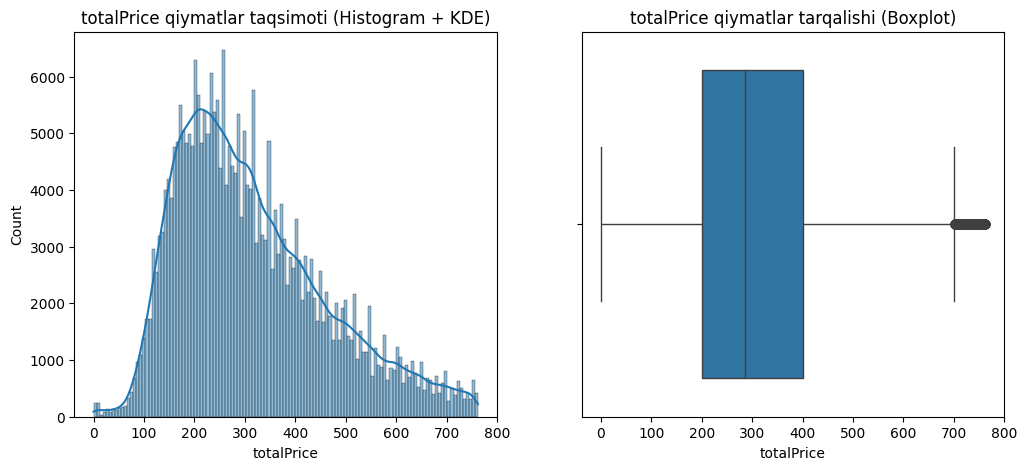

--- Log transformatsiyadan keyingi totalPrice_log ustuni statistikalari ---
count    283901.000000
mean          5.636183
std           0.521116
min           0.095310
25%           5.308268
50%           5.655992
75%           5.996452
max           6.637258
Name: totalPrice_log, dtype: float64




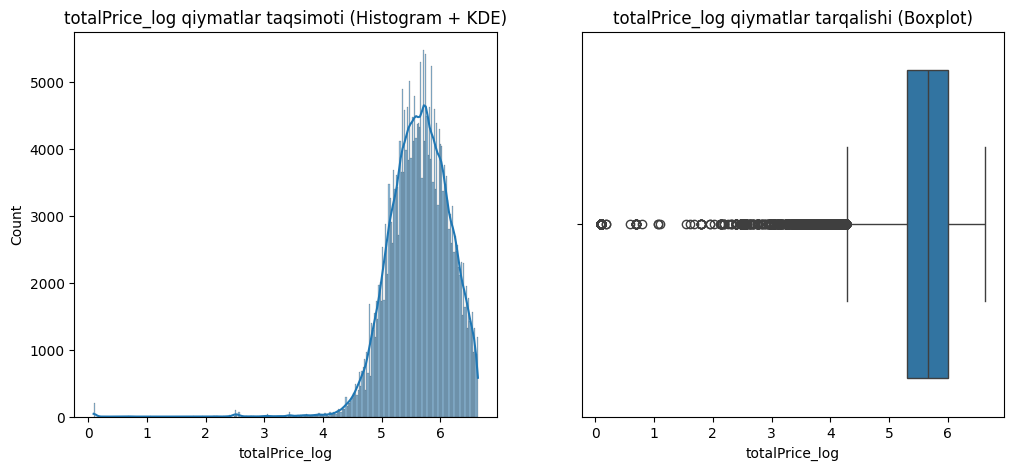

In [12]:

def target_distribution_check(df, target_col):
    print(f"--- {target_col} ustuni statistikalari ---")
    print(df[target_col].describe())
    print("\n")
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[target_col], kde=True)
    plt.title(f'{target_col} qiymatlar taqsimoti (Histogram + KDE)')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[target_col])
    plt.title(f'{target_col} qiymatlar tarqalishi (Boxplot)')
    
    plt.show()

def log_transform_and_check(df, target_col):
    df[target_col + '_log'] = np.log1p(df[target_col])
    print(f"--- Log transformatsiyadan keyingi {target_col}_log ustuni statistikalari ---")
    print(df[target_col + '_log'].describe())
    print("\n")
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[target_col + '_log'], kde=True)
    plt.title(f'{target_col}_log qiymatlar taqsimoti (Histogram + KDE)')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[target_col + '_log'])
    plt.title(f'{target_col}_log qiymatlar tarqalishi (Boxplot)')
    
    plt.show()


target_distribution_check(df, 'totalPrice')


log_transform_and_check(df, 'totalPrice')

# Ushbu jadval bizga Data set dagi turli omillar bir biri bilan qay darajada mosligini bildiradi. Misol uchun "square" va "kitchen" orasidagi bo`gliqlik darajasdi 0.75 ga teng 

In [14]:
df.isnull().sum()

Unnamed: 0               0
Lng                      1
Lat                      0
tradeTime                0
followers                0
totalPrice               0
square                   0
livingRoom               0
drawingRoom              0
kitchen                  0
bathRoom                 0
constructionTime         0
ladderRatio              0
fiveYearsProperty        0
subway                   0
communityAverage         0
floor_height             0
renovationCondition_2    0
renovationCondition_3    0
renovationCondition_4    0
buildingStructure_2      0
buildingStructure_3      0
buildingStructure_4      0
buildingStructure_5      0
buildingStructure_6      0
buildingType_2.0         0
buildingType_3.0         0
buildingType_4.0         0
district_2               0
district_3               0
district_4               0
district_5               0
district_6               0
district_7               0
district_8               0
district_9               0
district_10              0
d

# Demak bizda bo`sh ustunlar yoki qiymatlar yo`q 

# Data Preprocessing jarayoni 


# Missing Values (tushirib qoldirilgan qiymatlarni to`lidirsh jarayoni)

In [15]:
def cleaner(df):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype=="object":
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                df[col].fillna(df[col].mean(), inplace=True)
    return df 

In [16]:
df = cleaner(df)

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_13064\135523438.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283901 entries, 0 to 283900
Data columns (total 50 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             283901 non-null  int64  
 1   Lng                    283901 non-null  float64
 2   Lat                    283901 non-null  float64
 3   tradeTime              283901 non-null  int64  
 4   followers              283901 non-null  float64
 5   totalPrice             283901 non-null  float64
 6   square                 283901 non-null  float64
 7   livingRoom             283901 non-null  float64
 8   drawingRoom            283901 non-null  float64
 9   kitchen                283901 non-null  float64
 10  bathRoom               283901 non-null  float64
 11  constructionTime       283901 non-null  float64
 12  ladderRatio            283901 non-null  float64
 13  fiveYearsProperty      283901 non-null  float64
 14  subway                 283901 non-nu

# Encoding Jarayoni 

In [18]:
def encodlash(df):
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()    
    for col in df.columns:
        if df[col].dtype=="object":
            if df[col].nunique()<=6:
                dummies = pd.get_dummies(df[col], prefix="col", dtype=int)
                df = pd.concat([df.drop(columns=col), dummies,], axis = 1)
            else:
                encoder = LabelEncoder()
                df[col] = encoder.fit_transform(df[col])
    return df 

In [19]:
df = encodlash(df)

In [20]:
df.head()

,Unnamed: 0,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,...,elevator_1.0,floor_type_低,floor_type_底,floor_type_未知,floor_type_顶,floor_type_高,house_age,total_rooms,square_per_room,totalPrice_log
0,0,0.000000,0.627253,2016,0.092738,415.0,0.272992,0.250,0.2,0.333333,...,1,0,0,0,0,1,20.0,0.926190,0.294747,6.030685
1,1,0.597040,0.406733,2016,0.110236,575.0,0.276039,0.250,0.4,0.333333,...,1,0,0,0,0,1,21.0,1.269048,0.217517,6.356108
2,3,0.572140,0.717698,2016,0.120735,297.5,0.279617,0.375,0.2,0.333333,...,1,0,1,0,0,0,17.0,1.051190,0.266000,5.698770
3,4,0.557084,0.414236,2016,0.250219,392.0,0.162585,0.250,0.2,0.333333,...,0,0,0,0,0,0,65.0,0.926190,0.175542,5.973810
4,5,0.616393,0.582255,2016,0.049869,275.6,0.100757,0.125,0.0,0.333333,...,1,0,0,0,0,0,20.0,0.601190,0.167596,5.622572


# Scaling Jarayoni 

In [21]:
def scalinglash(df):
    from sklearn.preprocessing import StandardScaler
    standart_scaler = StandardScaler()
    num_col = df.select_dtypes(include=["float64", "int64"]).columns.drop("totalPrice")
    df[num_col]= standart_scaler.fit_transform(df[num_col])
    return df

In [22]:
df = scalinglash(df)

In [23]:
df.head()

,Unnamed: 0,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,...,elevator_1.0,floor_type_低,floor_type_底,floor_type_未知,floor_type_顶,floor_type_高,house_age,total_rooms,square_per_room,totalPrice_log
0,-1.750975,-3.077070,0.750755,0.757725,2.591319,415.0,1.636200,0.045206,-0.297015,0.06223,...,0.892755,-0.4987,-0.296602,-0.057514,-0.372451,1.888642,-0.679963,-0.217715,2.113464,0.757033
1,-1.750964,0.308281,-0.733525,0.757725,3.171573,575.0,1.680110,0.045206,1.699595,0.06223,...,0.892755,-0.4987,-0.296602,-0.057514,-0.372451,1.888642,-0.566589,1.433829,0.890443,1.381506
2,-1.750942,0.167089,1.359522,0.757725,3.519726,297.5,1.731657,1.402143,-0.297015,0.06223,...,0.892755,-0.4987,3.371525,-0.057514,-0.372451,-0.529481,-1.020085,0.384410,1.658220,0.120101
3,-1.750931,0.081720,-0.683022,0.757725,7.813605,392.0,0.045247,0.045206,-0.297015,0.06223,...,-1.120128,-0.4987,-0.296602,-0.057514,-0.372451,-0.529481,4.421874,-0.217715,0.225725,0.647891
4,-1.750920,0.418015,0.447877,0.757725,1.169697,275.6,-0.845686,-1.311731,-2.293625,0.06223,...,0.892755,-0.4987,-0.296602,-0.057514,-0.372451,-0.529481,-0.679963,-1.783241,0.099900,-0.026119


# Cleaning // Encoding // Scaling bo`yicha Class tuzamiz 

In [ ]:
# preprocessor = DataPreprocessing(df)
# preprocessor.tozala().encodla().scaling_qil()
# df = preprocessor.get_df()

# Data Setimizni Train Va Test qismlarga ajratib olamiz 

In [24]:
x = df.drop("totalPrice", axis=1)
y = df['totalPrice']

In [25]:

from sklearn.model_selection import train_test_split

In [26]:
x_train,x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Quyidagi Algoritmlar bo`yicha test qilib ko`ramiz 
1) Linear Regression
2) Decision Tree Regression
3) Random Forest Regression
4) Support Vector Machine Regression
5) KNN Regression 

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Algoritm Linear Regression 

In [47]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [48]:
lr_model

LinearRegression()

In [49]:

lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr_y_pred = lr_model.predict(x_test)
lr_y_pred

array([336.29918549, 200.80870279, 371.37117801, ..., 258.21734999,
       294.64449394, 164.25186357], shape=(28391,))

# MOdelni Baholash

# Modelni baholashda quyidagi baxolash usullari qollaniladi 
1) R² score
2) MSE (Mean Squared Error)
3) RMSE (Root Mean Squared Error)
4) MAE (Mean Absolute Error)

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, lr_y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, lr_y_pred)
r2 = r2_score(y_test, lr_y_pred)

print(f"Linear Regression natijalari:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

MOdel Regression natijalari:
MSE: 4427.62
RMSE: 66.54
MAE: 49.53
R² Score: 0.80


# K Cros Validation 

In [53]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
kn= KFold(n_splits=5, shuffle=True, random_state=42)
lr_scores = cross_val_score(lr_model, x, y, cv=kn, scoring="r2")
print(lr_scores)

[0.80257345 0.80345267 0.80699794 0.80005694 0.80272308]


In [ ]:
print(np.mean(lr_scores). round(4))

0.8032


In [ ]:

np.std(lr_scores)

np.float64(0.00223514462015633)

# Algoritm Decision Tree Regression 

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [30]:
dt_model

DecisionTreeRegressor()

In [31]:
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [32]:
dt_y_pred = dt_model.predict(x_test)
dt_y_pred

array([5.81413053, 5.26269019, 5.80211838, ..., 5.49716823, 5.63835467,
       5.12396398], shape=(28391,))

# Modelni baholashda quyidagi baxolash usullari qollaniladi 
1) R² score
2) MSE (Mean Squared Error)
3) RMSE (Root Mean Squared Error)
4) MAE (Mean Absolute Error)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, dt_y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, dt_y_pred)
r2 = r2_score(y_test, dt_y_pred)

print(f"MOdel Regression natijalari:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

ValueError: Found input variables with inconsistent numbers of samples: [56781, 28391]

In [ ]:
kn= KFold(n_splits=5, shuffle=True, random_state=42)
dt_scores = cross_val_score(dt_model, x, y, cv=kn, scoring="r2")
print(dt_scores)

[0.87878846 0.87840416 0.8840129  0.87821722 0.87994498]


In [ ]:
print(np.mean(dt_scores). round(4))

0.8799


In [ ]:
np.std(dt_scores)

np.float64(0.0021549616416210587)

In [41]:
pip install shap

   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------------- -------------- 1.8/2.8 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 8.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   -- ------------------------------------- 2.1/30.3 MB 10.8 MB/s eta 0:00:03
   ----- ---------------------------------- 3.9/30.3 MB 10.4 MB/s eta 0:00:03
   ----- ---------------------------------- 4.2/30.3 MB 7.1 MB/s eta 0:00:04
   -------- ------------------------------- 6.8/30.3 MB 8.2 MB/s eta 0:00:03
   ------------ --------------------------- 9.2/30.3 MB 8.6 MB/s eta 0:00:03
   ------------ --------------------------- 9.7/30.3 MB 8.7 MB/s eta 0:00:03
   ------------ -----


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 4.4 MB/s eta 0:00:34
    --------------------------------------- 2.9/150.0 MB 7.7 MB/s eta 0:00:20
   - -------------------------------------- 5.2/150.0 MB 8.9 MB/s eta 0:00:17
   - -------------------------------------- 6.8/150.0 MB 9.2 MB/s eta 0:00:16
   - -------------------------------------- 7.1/150.0 MB 7.5 MB/s eta 0:00:20
   -- ------------------------------------- 10.0/150.0 MB 8.3 MB/s eta 0:00:17
   --- ------------------------------------ 12.3/150.0 MB 8.7 MB/s eta 0:00:16
   --- ------------------------------------ 13.1/150.0 MB 8.8 MB/s eta 0:00:16
   ---- ----------------------------------- 16.3/150.0 MB 8.8 MB/s eta 0:00:16
   ---- ----------------------------------- 18.4/150.0 MB 8.9 MB/s eta 0:00:15
   ----- ---------------------------------- 20.4/150.0 MB 9.0 MB/s eta 0:


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


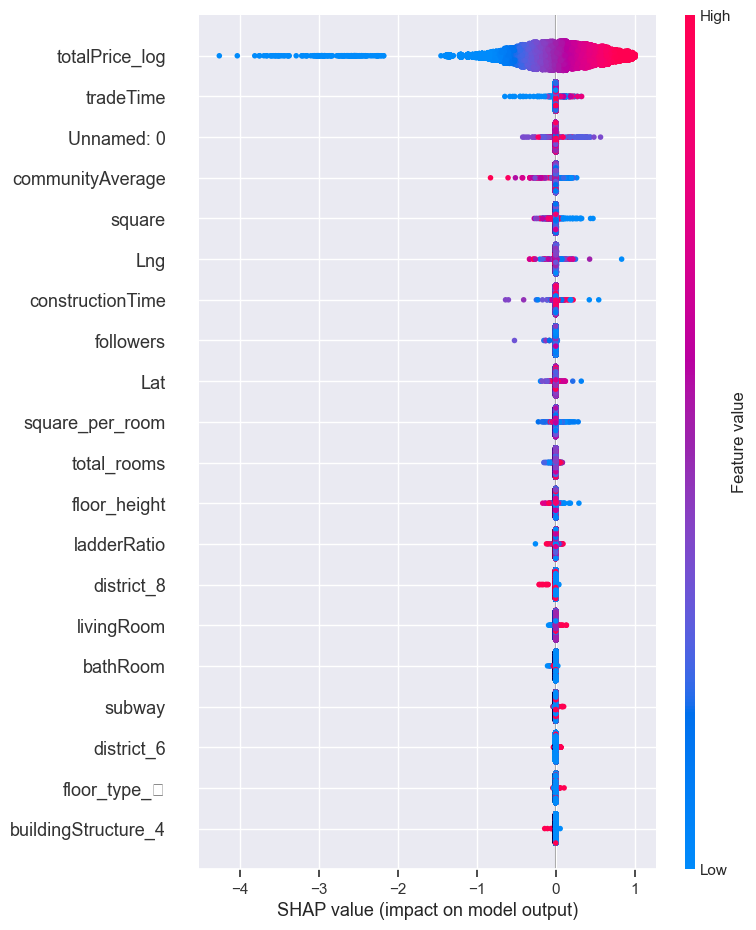

In [45]:
import shap
import xgboost as xgb

# Modelni o'qitamiz
model = xgb.XGBRegressor().fit(x_train, y_train)

# SHAP explainer tayyorlash
explainer = shap.Explainer(model)

# Test ma'lumotlari uchun SHAP qiymatlarni hisoblash
shap_values = explainer(x_test)

# SHAP summary plot
shap.summary_plot(shap_values, x_test)

In [47]:
from sklearn.model_selection import RandomizedSearchCV
dt_param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 11]
}

dt_model = DecisionTreeRegressor(random_state=42)
dt_random = RandomizedSearchCV(dt_model, dt_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
dt_random.fit(x_train, y_train)
dt_best = dt_random.best_estimator_
print("Best Decision Tree R2:", r2_score(y_test, dt_best.predict(x_test)))

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [56781, 28391]

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(dt_best.predict(X_test).shape)

(198730, 48)
(85171, 48)
(198730,)
(85171,)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- totalPrice_log


In [55]:
y_pred = dt_best.predict(x_test)
print(r2_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [85171, 28391]

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [58]:
dt_random.fit(X_train, y_train)
dt_best = dt_random.best_estimator_

y_pred = dt_best.predict(X_test)
print("R2:", r2_score(y_test, y_pred))

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R2: 0.7857058211418531


In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(198730, 48)
(85171, 48)
(198730,)
(85171,)


In [60]:
print(dt_best.predict(X_test).shape)

(85171,)


In [61]:
X_test.shape[0] == y_test.shape[0] == y_pred.shape[0]

True

In [62]:
print(x.shape)
print(y.shape)

(283901, 49)
(283901,)


In [63]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Example data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Randomized search
param_dist = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

dt = DecisionTreeRegressor(random_state=42)

dt_random = RandomizedSearchCV(
    dt, param_distributions=param_dist,
    n_iter=10, scoring='r2', cv=5, random_state=42
)

dt_random.fit(X_train, y_train)
dt_best = dt_random.best_estimator_

# ✅ Use X_test only!
y_pred = dt_best.predict(X_test)
print("R2:", r2_score(y_test, y_pred))


R2: 0.7945058048879029


In [49]:
import joblib

# Eng yaxshi modelni olish
best_model = random_search.best_estimator_

# Modelni faylga saqlash
joblib.dump(best_model, 'ML_1.joblib')
print("Model 'ML_1.joblib' nomli faylga saqlandi.")

NameError: name 'random_search' is not defined

In [ ]:
import joblib


joblib.dump(dt_best, 'decision_tree_model.pkl')


loaded_model = joblib.load('decision_tree_model.pkl')


y_pred = loaded_model.predict(X_test)


In [ ]:
# import pickle


# with open('decision_tree_model.pkl', 'wb') as f:
#     pickle.dump(dt_best, f)


# with open('decision_tree_model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)


# y_pred = loaded_model.predict(X_test)


# Hyperparameter Tuning  Grid Search CV bo`yicha & Algoritm Decision Tree Regression 

In [70]:
from sklearn.model_selection import GridSearchCV
dt_params={
    'max_depth':[3, 5, 10, None],    
    'min_samples_split':[2,5,10]
}

dt = DecisionTreeRegressor(random_state=42)
grid_dt = GridSearchCV(estimator=dt, param_grid=dt_params, cv=5, scoring='r2')
grid_dt.fit(x_train, y_train)
best_dt = grid_dt.best_estimator_

y_pred_dt = best_dt.predict(x_test)
print("Decision Tree Best Parameters:", grid_dt.best_params_)

Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_split': 10}


In [71]:
score=r2_score(y_test,y_pred_dt)
score

0.8916431460961507

# Hyperparameter Tuning  Randomised Search CV bo`yicha & Algoritm Linear Regression 

In [73]:
from sklearn.model_selection import RandomizedSearchCV
dt_param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 11]
}

dt_model = DecisionTreeRegressor(random_state=42)
dt_random = RandomizedSearchCV(dt_model, dt_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
dt_random.fit(x_train, y_train)
dt_best = dt_random.best_estimator_
print("Best Decision Tree R2:", r2_score(y_test, dt_best.predict(x_test)))

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Decision Tree R2: 0.895573237622837


In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns


corr_matrix = df[numeric_cols].corr()


corr_target = corr_matrix['totalPrice'].sort_values(ascending=False)


corr_with_target = pd.DataFrame(corr_target)

plt.figure(figsize=(6, len(corr_with_target)/2))  
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation with totalPrice')
plt.yticks(rotation=0)
plt.xticks([])  
plt.show()

In [ ]:
import shap 

# Algoritm Random  Forest Regression 

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [25]:
rf_model

RandomForestRegressor()

In [26]:
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
rf_y_pred = rf_model.predict(x_test)
rf_y_pred

array([330.938, 190.689, 333.885, ..., 219.68 , 268.405, 187.49 ],
      shape=(28391,))

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
mse = mean_squared_error(y_test, rf_y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rf_y_pred)
r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest Regession natijalari:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Random Forest Regession natijalari:
MSE: 1322.04
RMSE: 36.36
MAE: 22.85
R² Score: 0.94


In [32]:
kn= KFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_model, x, y, cv=kn, scoring="r2")
print(rf_scores)

KeyboardInterrupt: 

In [ ]:
print(np.mean(rf_scores). round(4))

In [ ]:
np.std(rf_scores)

# Hyperparameter Tuning  Grid Search CV bo`yicha & Algoritm Random Forest Regression 

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_params={
    'max_depth':[3, 5, 10, None],    
    'min_samples_split':[2,5,10]
}

 rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, scoring='r2')
grid_rf.fit(x_train, y_train)
best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(x_test)
print("Random Forest Best Parameters:", grid_rf.best_params_)

KeyboardInterrupt: 

In [ ]:
rf_score=r2_score(y_test,y_pred_rf)
rf_score

# Hyperparameter Tuning  Randomised Search CV bo`yicha & Algoritm Random Forest Regression 

In [34]:
from sklearn.model_selection import RandomizedSearchCV
rf_param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 11]
}

rf_model = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
rf_random.fit(x_train, y_train)
rf_best = rf_random.best_estimator_
print("Best Decision Tree R2:", r2_score(y_test, dt_best.predict(x_test)))

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

# Algoritm Support Vector Machine Regression

In [16]:
from sklearn.svm import SVR
svm_model = SVR()

In [17]:
svm_model

SVR()

In [ ]:
svm_model.fit(x_train, y_train)

In [ ]:
svm_y_pred = svm_model.predict(x_test)
svm_y_pred

In [ ]:
mse = mean_squared_error(y_test, svm_y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, svm_y_pred)
r2 = r2_score(y_test, svm_y_pred)

print(f"SVM Regression natijalari:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

In [ ]:
kn= KFold(n_splits=5, shuffle=True, random_state=42)
svm_scores = cross_val_score(svm_model, x, y, cv=kn, scoring="r2")
print(svm_scores)

In [ ]:
print(np.mean(svm_scores). round(4))

In [ ]:
np.std(svm_scores)

# Hyperparameter Tuning  GridSearch CV bo`yicha & Algoritm Support Vector Machine Regression 

In [ ]:
from sklearn.model_selection import GridSearchCV
svm_param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']
}

svm = SVR(random_state=42)
grid_svm = GridSearchCV(estimator=svm, svm_param_grid=svm_param_grid, cv=5, scoring='r2')
grid_svm.fit(x_train, y_train)
best_svm = grid_svm.best_estimator_

y_pred_svm = best_svm.predict(x_test)
print("Decision Tree Best Parameters:", grid_svm.best_params_)

In [ ]:
svm_score=r2_score(y_test,y_pred_svm)
svm_score

# Hyperparameter Tuning  RandomisedSearch CV bo`yicha & Algoritm Support Vector Machine Regression 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
svm_param_dist = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': uniform(0.1, 100),
    'epsilon': uniform(0.01, 1),
    'gamma': ['scale', 'auto']
}

svm_model = DecisionTreeRegressor(random_state=42)
svm_random = RandomizedSearchCV(svm_model, svm_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
svm_random.fit(x_train, y_train)
svm_best = svm_random.best_estimator_
print("Best Decision Tree R2:", r2_score(y_test, svm_best.predict(x_test)))

# Algoritm KNN Regressor 

In [1]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()

In [2]:
knn_model

KNeighborsRegressor()

In [1]:
knn_model.fit(x_train, y_train)

NameError: name 'knn_model' is not defined

In [ ]:
knn_y_pred = knn_model.predict(x_test)
knn_y_pred

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, knn_y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, knn_y_pred)
r2 = r2_score(y_test, knn_y_pred)

print(f"KNN Regressor natijalari:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
kn= KFold(n_splits=5, shuffle=True, random_state=42)
knn_scores = cross_val_score(knn_model, x, y, cv=kn, scoring="r2")
print(knn_scores)

In [ ]:
print(np.mean(knn_scores). round(2))

In [ ]:
np.std(knn_scores)

# Hyperparameter Tuning  Grid Search CV bo`yicha & Algoritm KNN  Regression 

In [ ]:
from sklearn.model_selection import GridSearchCV
dt_params={
    'max_depth':[3, 5, 10, None],    
    'min_samples_split':[2,5,10]
}

dt = DecisionTreeRegressor(random_state=42)
grid_dt = GridSearchCV(estimator=dt, param_grid=dt_params, cv=5, scoring='r2')
grid_dt.fit(x_train, y_train)
best_dt = grid_dt.best_estimator_

y_pred_dt = best_dt.predict(x_test)
print("Decision Tree Best Parameters:", grid_dt.best_params_)

In [ ]:
score=r2_score(y_test,y_pred_dt)
score

# Hyperparameter Tuning  Randomised Search CV bo`yicha & Algoritm KNN Regression 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
dt_param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 11]
}

dt_model = DecisionTreeRegressor(random_state=42)
dt_random = RandomizedSearchCV(dt_model, dt_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
dt_random.fit(x_train, y_train)
dt_best = dt_random.best_estimator_
print("Best Decision Tree R2:", r2_score(y_test, dt_best.predict(x_test)))

# Taqqoslash jadvali 

In [3]:
from tabulate import tabulate
df_malumot = [
    {
        "ALgoritm" : "Linear Regression",
        "R2 Score":"0.80",
        "MSE":"4427.62",
        "K-Cros_Val":"0.80",
        "LR_GridSearchCV":"0",
        "LR_RandomisedSearchCV":"0",
    },

    {
        "ALgoritm" : "Decision Tree Regression",
        "R2 Score":"0.88",
        "MSE":"2720.38",
        "K-Cros_Val":"0.87",
        "LR_GridSearchCV":"0.89",
        "LR_RandomisedSearchCV":"0.89",
    },


    {
        "ALgoritm" : "Random Forest Regression",
        "R2 Score":"0.94",
        "MSE":"1322.24",
        "K-Cros_Val":"0",
        "LR_GridSearchCV":"0",
        "LR_RandomisedSearchCV":"0",
    },    

    
    {
        "ALgoritm" : "SVM  Regression",
        "R2 Score":"0",
        "MSE":"0",
        "K-Cros_Val":"0",
        "LR_GridSearchCV":"0",
        "LR_RandomisedSearchCV":"0",
    },    


    {
        "ALgoritm" : "KNN Regression",
        "R2 Score":"0.77",
        "MSE":"5080.63",
        "K-Cros_Val":"0",
        "LR_GridSearchCV":"0",
        "LR_RandomisedSearchCV":"0",
    },    
]


print(tabulate(df_malumot, headers="keys", tablefmt="grid"))

+--------------------------+------------+---------+--------------+-------------------+-------------------------+
| ALgoritm                 |   R2 Score |     MSE |   K-Cros_Val |   LR_GridSearchCV |   LR_RandomisedSearchCV |
+==========================+============+=========+==============+===================+=========================+
| Linear Regression        |       0.8  | 4427.62 |         0.8  |              0    |                    0    |
+--------------------------+------------+---------+--------------+-------------------+-------------------------+
| Decision Tree Regression |       0.88 | 2720.38 |         0.87 |              0.89 |                    0.89 |
+--------------------------+------------+---------+--------------+-------------------+-------------------------+
| Random Forest Regression |       0.94 | 1322.24 |         0    |              0    |                    0    |
+--------------------------+------------+---------+--------------+-------------------+----------

# Modelni Saqlash 

In [ ]:
import joblib 
joblib.dump(svm_model, 'ML_1_Model.pkl')